<a href="https://colab.research.google.com/github/WajdiB41/demo-repo/blob/feature-readme-instruction/Car_Price_Prediction_Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Using the right version of tensorflow
%tensorflow_version 2.x

In [2]:
# Load the import 
# from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers

from matplotlib import pyplot as plt
import seaborn as sns

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

tf.keras.backend.set_floatx('float32')

print("Imported the modules.")

Imported the modules.


In [3]:
# import train_df which contain train set

from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['CarPrice_Assignment.csv']))
# Dataset is now stored in a Pandas Dataframe


Saving CarPrice_Assignment.csv to CarPrice_Assignment.csv


In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.5,2.7,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.5,2.7,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.7,3.5,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.2,3.4,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.2,3.4,8.0,115,5500,18,22,17450.0


In [5]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.8,3.1,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.8,3.1,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.6,2.9,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.0,3.4,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.8,3.1,9.5,114,5400,19,25,22625.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0
mean,103.0,0.8,98.8,174.0,65.9,53.7,2555.6,126.9,3.3,3.3,10.1,104.1,5125.1,25.2,30.8,13276.7
std,59.3,1.2,6.0,12.3,2.1,2.4,520.7,41.6,0.3,0.3,4.0,39.5,477.0,6.5,6.9,7988.9
min,1.0,-2.0,86.6,141.1,60.3,47.8,1488.0,61.0,2.5,2.1,7.0,48.0,4150.0,13.0,16.0,5118.0
25%,52.0,0.0,94.5,166.3,64.1,52.0,2145.0,97.0,3.1,3.1,8.6,70.0,4800.0,19.0,25.0,7788.0
50%,103.0,1.0,97.0,173.2,65.5,54.1,2414.0,120.0,3.3,3.3,9.0,95.0,5200.0,24.0,30.0,10295.0
75%,154.0,2.0,102.4,183.1,66.9,55.5,2935.0,141.0,3.6,3.4,9.4,116.0,5500.0,30.0,34.0,16503.0
max,205.0,3.0,120.9,208.1,72.3,59.8,4066.0,326.0,3.9,4.2,23.0,288.0,6600.0,49.0,54.0,45400.0


In [8]:
df.isnull().sum()

car_ID        0
symboling     0
CarName       0
fueltype      0
aspiration    0
             ..
horsepower    0
peakrpm       0
citympg       0
highwaympg    0
price         0
Length: 26, dtype: int64

In [9]:
# Shuffle the examples
df = df.reindex(np.random.permutation(df.index))

In [10]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
177,178,-1,toyota mark ii,gas,std,four,hatchback,fwd,front,102.4,175.6,66.5,53.9,2458,ohc,four,122,mpfi,3.3,3.5,8.7,92,4200,27,32,11248.0
136,137,3,saab 99gle,gas,turbo,two,hatchback,fwd,front,99.1,186.6,66.5,56.1,2808,dohc,four,121,mpfi,3.5,3.1,9.0,160,5500,19,26,18150.0
189,190,3,vw dasher,gas,std,two,convertible,fwd,front,94.5,159.3,64.2,55.6,2254,ohc,four,109,mpfi,3.2,3.4,8.5,90,5500,24,29,11595.0
21,22,1,dodge rampage,gas,std,two,hatchback,fwd,front,93.7,157.3,63.8,50.8,1876,ohc,four,90,2bbl,3.0,3.2,9.4,68,5500,37,41,5572.0
153,154,0,toyota corona hardtop,gas,std,four,wagon,fwd,front,95.7,169.7,63.6,59.1,2280,ohc,four,92,2bbl,3.0,3.0,9.0,62,4800,31,37,6918.0


In [11]:
# Cleaning data especially car name
df['CarName'].unique()

array(['toyota mark ii', 'saab 99gle', 'vw dasher', 'dodge rampage',
       'toyota corona hardtop', 'audi 100ls', 'isuzu MU-X', 'jaguar xf',
       'chevrolet monte carlo', 'dodge colt (sw)',
       'plymouth satellite custom (sw)', 'dodge coronet custom (sw)',
       'peugeot 604sl', 'mitsubishi g4', 'volkswagen dasher',
       'plymouth cricket', 'nissan gt-r', 'toyota corolla liftback',
       'alfa-romero Quadrifoglio', 'mazda 626', 'peugeot 504',
       'toyota celica gt', 'volkswagen super beetle', 'subaru tribeca',
       'volvo 145e (sw)', 'porsche cayenne', 'plymouth duster', 'bmw x4',
       'toyota corona mark ii', 'toyota corona', 'mazda glc deluxe',
       'honda civic 1300', 'mazda rx-4', 'toyota starlet',
       'toyota carina', 'mitsubishi montero', 'nissan clipper',
       'buick electra 225 custom', 'subaru', 'mazda glc custom l',
       'jaguar xj', 'subaru baja', 'buick skylark', 'volkswagen rabbit',
       'mazda rx-7 gs', 'honda civic cvcc', 'renault 12tl', 'volv

In [12]:
len(df['CarName'].unique())

147

In [13]:
#Data Cleaning

df['CarName'].replace(to_replace=r'alf.+', value='alfa', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'aud.+', value='audi', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'bmw.+', value='bmw', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'chev.+', value='chevrolet', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'dodge.+', value='dodge', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'hondci.+', value='civic', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'hondacc.+', value='accord', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'j.+', value='jaguar', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'isuz.+', value='isuzu', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'max.+', value='mazda', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'maz.+', value='mazda', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'buic.+', value='buick', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'mitsu.+', value='mitsubishi', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'N.+', value='nissan', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'niss.+', value='nissan', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'peug.+', value='peugeot', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'ply.+', value='plymouth', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'por.+', value='porsche', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'ren.+', value='renault', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'saab.+', value='saab', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'suba.+', value='subaru', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'toyota corol.+', value='toyota corolla', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'toyota coron.+', value='toyota corona', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'toyota cel.+', value='toyota celica', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'volk.+', value='volkswagen', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'voks.+', value='volkswagen', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'volv.+', value='volvo', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'vw.+', value='volkswagen', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'honda a.+', value='honda accord', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'honda c.+', value='honda civic', regex=True, inplace=True),


(None,)

In [14]:
df['CarName'].unique()

array(['toyota mark ii', 'saab', 'volkswagen', 'dodge', 'toyota corona',
       'audi', 'isuzu', 'jaguar', 'chevrolet', 'plymouth', 'peugeot',
       'mitsubishi', 'nissan', 'toyota corolla', 'alfa', 'mazda',
       'toyota celica', 'subaru', 'volvo', 'porsche', 'bmw',
       'honda civic', 'toyota starlet', 'toyota carina', 'buick',
       'renault', 'honda prelude', 'honda accord', 'toyota tercel',
       'toyota cressida', 'mercury cougar', 'toyouta tercel'],
      dtype=object)

In [15]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.20)

print(f"No. of training examples: {train_df.shape[0]}")
print(f"No. of testing examples: {test_df.shape[0]}")

No. of training examples: 164
No. of testing examples: 41


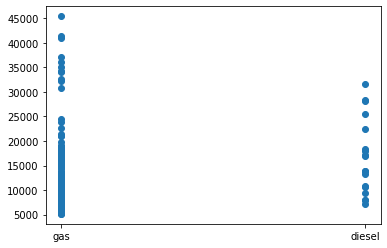

In [16]:
#evaluate the fueltype with the price
x = train_df['fueltype']
y = train_df['price']
plt.plot(x,y, 'o')

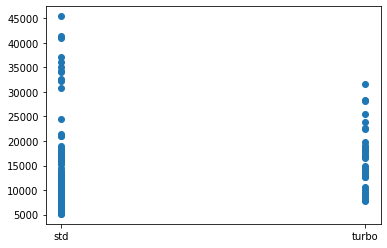

In [17]:
#evaluate the aspiration with price
x = train_df['aspiration']
y = train_df['price']
plt.plot(x,y, 'o')

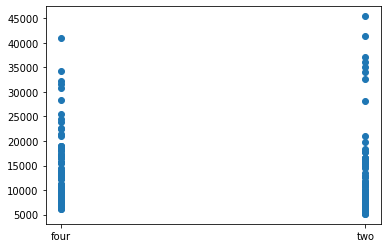

In [18]:
#evaluate the doornumber with price 
x = train_df['doornumber']
y = train_df['price']
plt.plot(x,y, 'o')

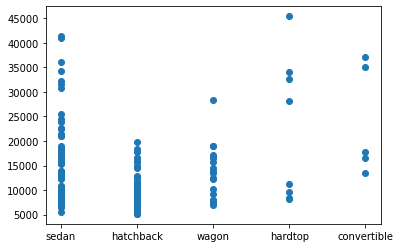

In [19]:
#evaluate the carbody with price 
x = train_df['carbody']
y = train_df['price']
plt.plot(x,y, 'o')

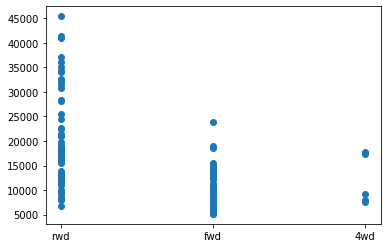

In [20]:
#evaluate the drivewheel with price 
x = train_df['drivewheel']
y = train_df['price']
plt.plot(x,y, 'o')

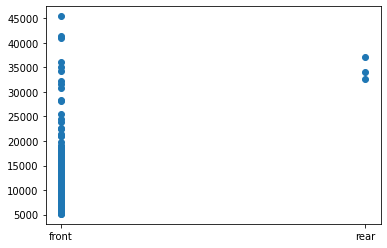

In [21]:
#evaluate the enginelocation with price 
x = train_df['enginelocation']
y = train_df['price']
plt.plot(x,y, 'o')

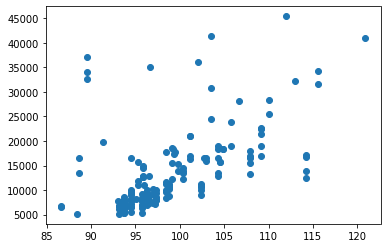

In [22]:
#evaluate the wheelbase with price 
x = train_df['wheelbase']
y = train_df['price']
plt.plot(x,y, 'o')

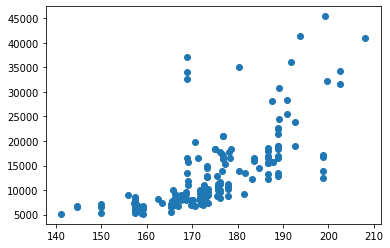

In [23]:
#evaluate the carlength with price 
x = train_df['carlength']
y = train_df['price']
plt.plot(x,y, 'o')

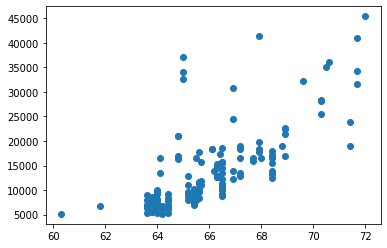

In [24]:
#evaluate the carwidth with price 
x = train_df['carwidth']
y = train_df['price']
plt.plot(x,y, 'o')

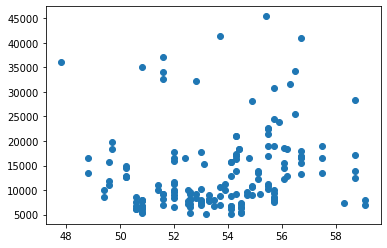

In [25]:
#evaluate the carheight with price 
x = train_df['carheight']
y = train_df['price']
plt.plot(x,y, 'o')

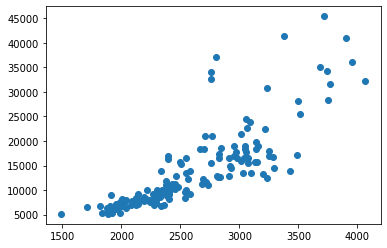

In [26]:
#evaluate the carweight with price 
x = train_df['curbweight']
y = train_df['price']
plt.plot(x,y, 'o')

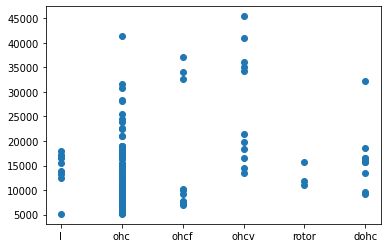

In [27]:
#evaluate the enginetype with price 
x = train_df['enginetype']
y = train_df['price']
plt.plot(x,y, 'o')

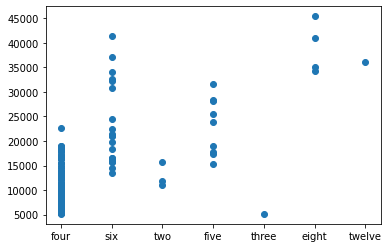

In [28]:
#evaluate the cylindernumber with price 
x = train_df['cylindernumber']
y = train_df['price']
plt.plot(x,y, 'o')

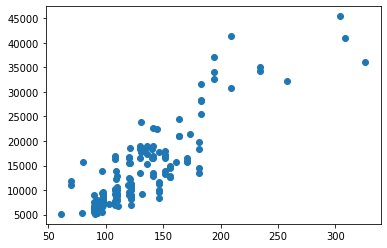

In [29]:
#evaluate the enginesize with price 
x = train_df['enginesize']
y = train_df['price']
plt.plot(x,y, 'o')

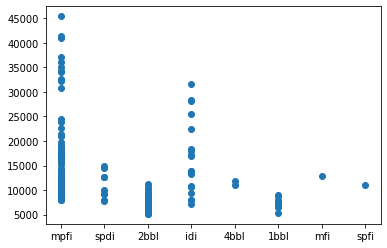

In [30]:
#evaluate the fuelsystem with price 
x = train_df['fuelsystem']
y = train_df['price']
plt.plot(x,y, 'o')

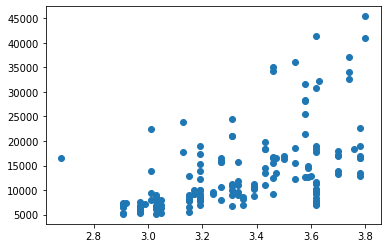

In [31]:
#evaluate the boreratio with price 
x = train_df['boreratio']
y = train_df['price']
plt.plot(x,y, 'o')

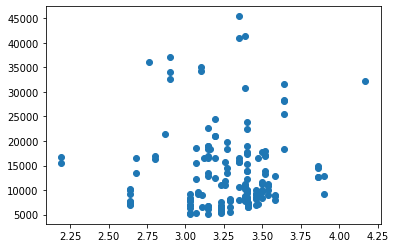

In [32]:
#evaluate the stroke with price 
x = train_df['stroke']
y = train_df['price']
plt.plot(x,y, 'o')

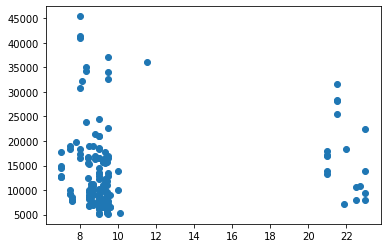

In [33]:
#evaluate the compressionratio with price 
x = train_df['compressionratio']
y = train_df['price']
plt.plot(x,y, 'o')

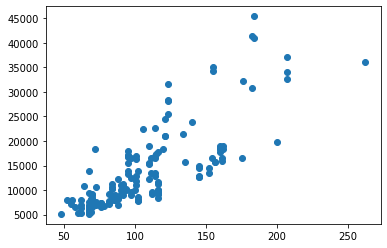

In [34]:
#evaluate the horsepower with price 
x = train_df['horsepower']
y = train_df['price']
plt.plot(x,y, 'o')

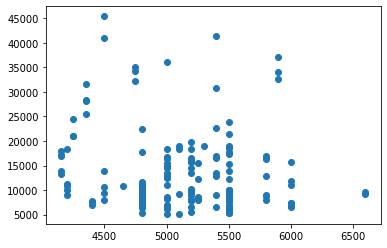

In [35]:
#evaluate the peakrpm with price 
x = train_df['peakrpm']
y = train_df['price']
plt.plot(x,y, 'o')

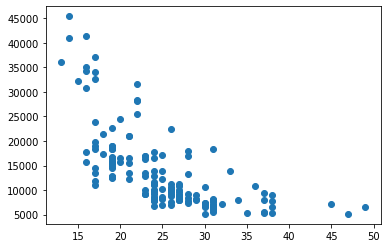

In [36]:
#evaluate the citympg with price 
x = train_df['citympg']
y = train_df['price']
plt.plot(x,y, 'o')

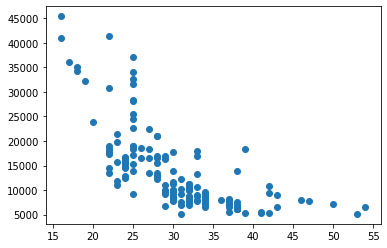

In [37]:
#evaluate the highwaympg with price 
x = train_df['highwaympg']
y = train_df['price']
plt.plot(x,y, 'o')

In [38]:
# Check Pearson corrolation to investigate the linear relationship between two continious variables
# If the features have a week relationship with the price i will drop it 
# Check the P-value to analyze the corrolation is statisticly significant or not
# above 0.05 is not significant
# below 0.05 is significant

from scipy import stats

num_columns = df.select_dtypes(exclude='object').columns

for i in list(num_columns):
    pearson_coeff, p_value = stats.pearsonr(df[i], df['price'])
    print(i.capitalize())
    print(f'Pearson Co-relation: {pearson_coeff}')
    print(f'P-Value: {p_value}')
    if p_value<0.05:
        print('Correlation is Significant')
    else:
        print('Correlation is Insignificant')
    print('')



Car_id
Pearson Co-relation: -0.10909333948229955
P-Value: 0.11945179263824951
Correlation is Insignificant

Symboling
Pearson Co-relation: -0.07997822464270347
P-Value: 0.25431175848636967
Correlation is Insignificant

Wheelbase
Pearson Co-relation: 0.57781559829215
P-Value: 1.1828204863378005e-19
Correlation is Significant

Carlength
Pearson Co-relation: 0.6829200156779626
P-Value: 1.678706624074517e-29
Correlation is Significant

Carwidth
Pearson Co-relation: 0.7593252997415116
P-Value: 9.627437876119569e-40
Correlation is Significant

Carheight
Pearson Co-relation: 0.11933622657049446
P-Value: 0.08832832352275669
Correlation is Insignificant

Curbweight
Pearson Co-relation: 0.8353048793372965
P-Value: 1.2144448264033587e-54
Correlation is Significant

Enginesize
Pearson Co-relation: 0.8741448025245118
P-Value: 1.3547637598647268e-65
Correlation is Significant

Boreratio
Pearson Co-relation: 0.5531732367984434
P-Value: 7.907922278249534e-18
Correlation is Significant

Stroke
Pearson 

In [39]:
print(num_columns)

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


In [40]:
drop = []
for i in list(num_columns):
    pearson_coeff, p_value = stats.pearsonr(df[i], df['price'])
    if p_value > 0.05:
        drop.append(i)

In [41]:
print(drop)

['car_ID', 'symboling', 'carheight', 'stroke', 'compressionratio', 'peakrpm']


In [42]:
# We will drop from our dataset the "drop" list and the "doors number" columns
df.drop(drop, axis=1, inplace=True)
df.drop('doornumber', axis=1, inplace=True)

In [43]:
df.shape

(205, 19)

In [44]:
df.head()

,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
177,toyota mark ii,gas,std,hatchback,fwd,front,102.4,175.6,66.5,2458,ohc,four,122,mpfi,3.3,92,27,32,11248.0
136,saab,gas,turbo,hatchback,fwd,front,99.1,186.6,66.5,2808,dohc,four,121,mpfi,3.5,160,19,26,18150.0
189,volkswagen,gas,std,convertible,fwd,front,94.5,159.3,64.2,2254,ohc,four,109,mpfi,3.2,90,24,29,11595.0
21,dodge,gas,std,hatchback,fwd,front,93.7,157.3,63.8,1876,ohc,four,90,2bbl,3.0,68,37,41,5572.0
153,toyota corona,gas,std,wagon,fwd,front,95.7,169.7,63.6,2280,ohc,four,92,2bbl,3.0,62,31,37,6918.0


In [45]:
df.corr()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price
wheelbase,1.0,0.9,0.8,0.8,0.6,0.5,0.4,-0.5,-0.5,0.6
carlength,0.9,1.0,0.8,0.9,0.7,0.6,0.6,-0.7,-0.7,0.7
carwidth,0.8,0.8,1.0,0.9,0.7,0.6,0.6,-0.6,-0.7,0.8
curbweight,0.8,0.9,0.9,1.0,0.9,0.6,0.8,-0.8,-0.8,0.8
enginesize,0.6,0.7,0.7,0.9,1.0,0.6,0.8,-0.7,-0.7,0.9
boreratio,0.5,0.6,0.6,0.6,0.6,1.0,0.6,-0.6,-0.6,0.6
horsepower,0.4,0.6,0.6,0.8,0.8,0.6,1.0,-0.8,-0.8,0.8
citympg,-0.5,-0.7,-0.6,-0.8,-0.7,-0.6,-0.8,1.0,1.0,-0.7
highwaympg,-0.5,-0.7,-0.7,-0.8,-0.7,-0.6,-0.8,1.0,1.0,-0.7
price,0.6,0.7,0.8,0.8,0.9,0.6,0.8,-0.7,-0.7,1.0


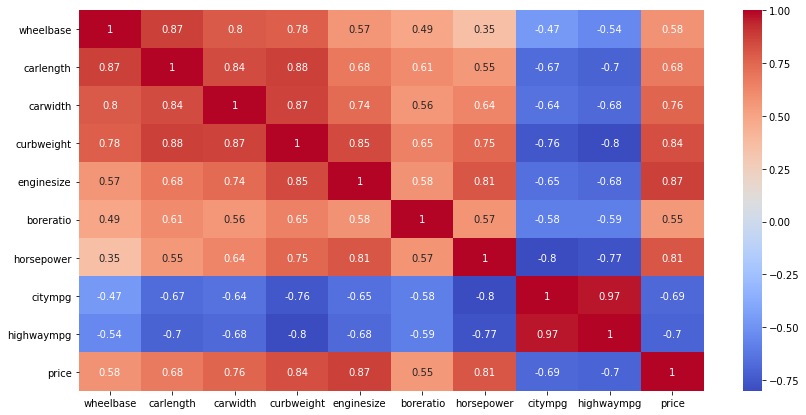

In [46]:
#Better to visualize the correlation using a heatMap
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [50]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [54]:
df_col=("fueltype","aspiration","carbody","drivewheel","enginelocation","enginetype","cylindernumber","fuelsystem")

In [55]:
for i in df_col:
    df[i]=le.fit_transform(df[i])

In [56]:
df.head()

,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
177,toyota mark ii,1,0,2,1,0,102.4,175.6,66.5,2458,3,2,122,5,3.3,92,27,32,11248.0
136,saab,1,1,2,1,0,99.1,186.6,66.5,2808,0,2,121,5,3.5,160,19,26,18150.0
189,volkswagen,1,0,0,1,0,94.5,159.3,64.2,2254,3,2,109,5,3.2,90,24,29,11595.0
21,dodge,1,0,2,1,0,93.7,157.3,63.8,1876,3,2,90,1,3.0,68,37,41,5572.0
153,toyota corona,1,0,4,1,0,95.7,169.7,63.6,2280,3,2,92,1,3.0,62,31,37,6918.0


In [57]:
df=df.drop(['CarName'],axis=1)

In [58]:
df.head()

,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
177,1,0,2,1,0,102.4,175.6,66.5,2458,3,2,122,5,3.3,92,27,32,11248.0
136,1,1,2,1,0,99.1,186.6,66.5,2808,0,2,121,5,3.5,160,19,26,18150.0
189,1,0,0,1,0,94.5,159.3,64.2,2254,3,2,109,5,3.2,90,24,29,11595.0
21,1,0,2,1,0,93.7,157.3,63.8,1876,3,2,90,1,3.0,68,37,41,5572.0
153,1,0,4,1,0,95.7,169.7,63.6,2280,3,2,92,1,3.0,62,31,37,6918.0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 177 to 156
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fueltype        205 non-null    int64  
 1   aspiration      205 non-null    int64  
 2   carbody         205 non-null    int64  
 3   drivewheel      205 non-null    int64  
 4   enginelocation  205 non-null    int64  
 5   wheelbase       205 non-null    float64
 6   carlength       205 non-null    float64
 7   carwidth        205 non-null    float64
 8   curbweight      205 non-null    int64  
 9   enginetype      205 non-null    int64  
 10  cylindernumber  205 non-null    int64  
 11  enginesize      205 non-null    int64  
 12  fuelsystem      205 non-null    int64  
 13  boreratio       205 non-null    float64
 14  horsepower      205 non-null    int64  
 15  citympg         205 non-null    int64  
 16  highwaympg      205 non-null    int64  
 17  price           205 non-null    f

In [62]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


In [64]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [65]:
# predicting result
y_pred=regressor.predict(X_test)

In [67]:
regressor.score(X_test,y_test)

0.9192249290139678

In [68]:
# Accuracy score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9192249290139678